In [3]:
import radiomics
from radiomics import featureextractor
import six, numpy as np
import SimpleITK as sitk
import seaborn as sns
# from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import pandas as pd
import os
import shutil
import yaml
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, f1_score
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



In [4]:
ex_ring = pd.read_csv('../dataset/PyRadiomics_files/radiomics_external.csv')
lesion = pd.read_csv('../dataset/PyRadiomics_files/radiomics_lesion.csv')

In [8]:
data_pd = pd.read_csv('../dataset/metadata/HAM10000_metadata.csv')
data_pd.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [20]:
dp = data_pd[['image_id', 'dx']]
dp

,image_id,dx
0,ISIC_0027419,bkl
1,ISIC_0025030,bkl
2,ISIC_0026769,bkl
3,ISIC_0025661,bkl
4,ISIC_0031633,bkl
...,...,...
10010,ISIC_0033084,akiec
10011,ISIC_0033550,akiec
10012,ISIC_0033536,akiec
10013,ISIC_0032854,akiec


In [11]:
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0032214'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0032215'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025277'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0029819'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0034047'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0029609'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025061'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0028361'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0026042'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0030687'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025987'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0030006'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0031070'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0028110'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0033377'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0033031'].index, inplace = True)

In [21]:
lesion

,image_id,dx,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,ISIC_0027419,bkl,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ISIC_0025030,bkl,192.0,217.0,5.409632e+09,4.369942,13.0,3.540864,250.0,204.184127,...,728.729959,0.000604,6.710587,0.407631,9.897791,3.385021,0.000121,1517.958114,0.023034,0.177788
2,ISIC_0026769,bkl,105.0,192.0,2.588999e+08,5.874022,59.0,1.765561,212.0,147.007357,...,1229.063272,0.001027,7.489928,0.568801,2.107322,0.149914,0.003139,2997.610353,0.168758,5.490538
3,ISIC_0025661,bkl,79.0,169.0,2.307388e+08,5.860003,46.0,2.351846,220.0,116.413229,...,1583.524561,0.000653,7.574148,0.554173,2.446843,0.091326,0.002431,5165.659406,0.078868,9.165628
4,ISIC_0031633,bkl,136.0,212.0,2.066242e+09,5.679751,41.0,2.811163,229.0,179.691068,...,998.796114,0.000971,8.342909,0.322720,17.334793,0.347983,0.000902,1594.235155,0.075273,1.806496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,ISIC_0033084,akiec,135.0,202.0,1.920089e+09,5.562589,44.0,1.886217,239.0,167.011429,...,657.540211,0.001365,7.895817,0.391249,9.432622,0.930090,0.000610,1953.540462,0.082483,0.952750
9995,ISIC_0033550,akiec,125.0,200.0,2.621105e+09,5.757204,45.0,2.209660,225.0,165.310586,...,1024.403900,0.000705,8.123790,0.385832,9.842129,0.612577,0.000555,2048.448485,0.075306,1.049169
9996,ISIC_0033536,akiec,149.0,203.0,3.442482e+09,5.317382,31.0,2.566600,226.0,177.223965,...,884.973606,0.000609,7.731134,0.387643,8.827970,1.048729,0.000350,1720.699298,0.051668,0.591937
9997,ISIC_0032854,akiec,135.0,194.0,1.034287e+09,5.421503,36.0,2.192556,212.0,165.167821,...,693.060344,0.001359,7.428797,0.469631,4.196538,0.679602,0.000938,1368.693240,0.094541,0.999094


In [22]:
# pd.merge(lesion, ex_ring, on = )
lesion_ring = pd.merge(lesion, ex_ring, on = 'image_id')

In [65]:
lesion_ring['dx_y']

0         bkl
1         bkl
2         bkl
3         bkl
4         bkl
        ...  
9994    akiec
9995    akiec
9996    akiec
9997    akiec
9998      mel
Name: dx_y, Length: 9999, dtype: object

In [66]:
X = lesion_ring.drop(['image_id', 'dx_x','dx_y'], axis = 1)
# dp = data_pd[['image_id', 'dx']]
# print(dp)
y = lesion_ring['dx_x']

In [67]:
codes = {'akiec':0, 'bcc':1, 'bkl':2, 'df':3, 'mel':4, 'nv':5, 'vasc':6}

y = y.map(codes) 


In [68]:
from imblearn.over_sampling import RandomOverSampler    # to balance an imbalanced dataset.
# Initializing the RandomOverSampler object with a specified random_state for reproducibility.
ROS = RandomOverSampler(random_state = 42)

# This method generates a balanced dataset by oversampling the minority class
x_resampled, y_resampled = ROS.fit_resample(X, y)


In [69]:
x_resampled.isnull().sum()


original_firstorder_10Percentile_x          0
original_firstorder_90Percentile_x          0
original_firstorder_Energy_x                0
original_firstorder_Entropy_x               0
original_firstorder_InterquartileRange_x    0
                                           ..
original_ngtdm_Busyness_y                   0
original_ngtdm_Coarseness_y                 0
original_ngtdm_Complexity_y                 0
original_ngtdm_Contrast_y                   0
original_ngtdm_Strength_y                   0
Length: 106, dtype: int64

In [70]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # calculate VIF for each feature

# vif = pd.DataFrame()

# vif["VIF Factor"] = [variance_inflation_factor(lesion_ring.values, i) for i in range(lesion_ring.shape[1])]

# vif["features"] = lesion_ring.columns

# # print VIF values

# print(vif)

In [71]:
# from sklearn.feature_selection import SelectKBest

# from sklearn.feature_selection import f_regression

# # define number of features to keep

# k = 30
# lr = lesion_ring.drop(['image_id'], axis = 1)
# # perform feature selection

# X_new = SelectKBest(f_regression, k=k).fit_transform(lr, y)

# # get feature names of selected features

# selected_features = lr.columns[SelectKBest(f_regression, k=k).fit(lr, y).get_support()]

# # print selected features

# print(selected_features)

In [72]:
# xx = x_resampled[selected_features]
# print(xx.head())

In [103]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)
# X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X,y, test_size=0.2, random_state=0)
# 

In [104]:
# x_resampled['dx_y']

In [105]:


#scaling and centering the data
sc = StandardScaler()
X_train_scaled_n = sc.fit_transform(X_train_n)
X_test_scaled_n = sc.transform(X_test_n)

In [106]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

In [107]:
svm.fit(X_train_scaled_n,y_train_n.values)


SVC(gamma=0.5)

In [108]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [109]:
y_pretrain_n =svm.predict(x_val_n)

accuracy_score(y_val_n, y_pretrain_n)


0.9716666666666667

8442 8442 938 938
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       130
           1       1.00      0.95      0.97       133
           2       1.00      0.69      0.81       118
           3       1.00      1.00      1.00       141
           4       1.00      0.65      0.79       132
           5       0.62      1.00      0.76       148
           6       1.00      1.00      1.00       136

    accuracy                           0.90       938
   macro avg       0.95      0.90      0.90       938
weighted avg       0.94      0.90      0.90       938



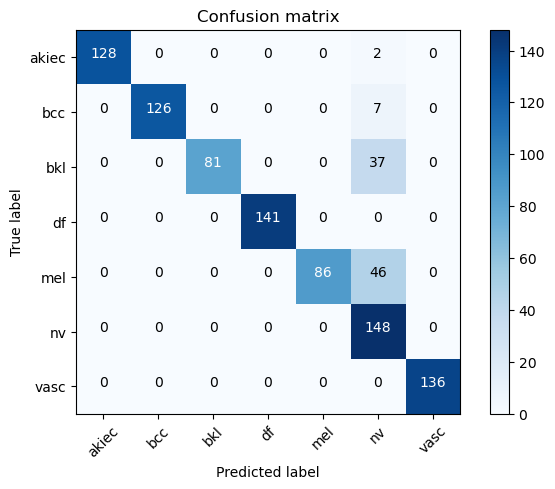

In [110]:
x_val_n, x_test_nn, y_val_n, y_test_nn = train_test_split(X_test_scaled_n, y_test_n, test_size=0.1, random_state=42 )  
print(len(x_val_n), len(y_val_n),len(x_test_nn),len(y_test_nn))
svm.fit(x_val_n, y_val_n.values)
y_pre_nn = svm.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)
# xp = classification_report(y_test_nn,y_pre_nn)
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
# plt.savefig('../presentation/conf_mat_svm_rbf_lession_ring50.png', dpi = 100)
plt.show()

In [111]:
clf = RandomForestClassifier( random_state=42)

In [112]:
param_grid = { 
    # 'n_estimators': [200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [2,4,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
# .fit(x_train, y_train)

# xp = classification_report(y_test_nn,y_pre_nn)

# clf.fit(X, y)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       130
           1       0.92      0.95      0.93       133
           2       0.71      0.72      0.72       118
           3       0.98      1.00      0.99       141
           4       0.75      0.71      0.73       132
           5       0.60      0.57      0.59       148
           6       0.99      1.00      0.99       136

    accuracy                           0.85       938
   macro avg       0.84      0.85      0.85       938
weighted avg       0.84      0.85      0.85       938



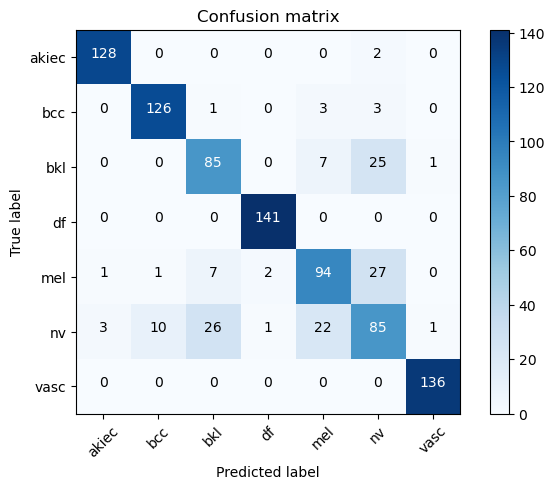

In [113]:
clf.fit(x_val_n, y_val_n.values)
y_pre_nn = clf.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
# plt.savefig('../presentation/conf_mat_rfc_d50.png', dpi = 100)
plt.show()